## 1. Defining the question

### a) Specifying the Data analytic Question.

An NGO in the health sector, wants to learn about the trends in the vaccination space.In the year  2009, a pandemic caused by the H1N1 influenza virus, colloquially named "swine flu," swept across the world. Researchers estimate that in the first year, it was responsible for between 151,000 to 575,000 deaths globally.The Gates foundation wants to find out if they can forecast vaccination of an individual based on specific parameters.

> <strong>Problem Statement:</strong>The goal of this project is to forecast whether one has received the seasonal flu vaccine.

### b) Defining the metric for success.

> Having a model of an accuracy of at least 80%

### c) Recording the experimental Design.

- Research Question: Can one predict whether people got seasonal flu vaccine using information they shared about their backgrounds, opinions, and health behaviors?
- Data Source: The data set was sourced from DrivenData,but was initially collected from National Center for Health Statistics,U.S. Department of Health and Human Services (DHHS). National Center for Health Statistics. The National 2009 H1N1 Flu Survey. Hyattsville, MD: Centers for Disease Control and Prevention, 2012.
- Variables:The variables included are:'respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation'.
- Model evaluation:The metrics used to evaluate the model’s performance are: accuracy,precision,recall,f-1 score.
- Conclusions and recommendations

## 2. Loading the data.

In [2]:
#import relevant libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy.stats import norm 
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [3]:
#load the data sets
test_data = pd.read_csv("test_set_features.csv")
train_data = pd.read_csv("training_set_features.csv")
train_data_labels = pd.read_csv("training_set_labels.csv")

In [4]:
#display the training data
train_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


## 3. Data Understanding

The data in use is from [Datadriven](https://www.drivendata.org/competitions/66/flu-shot-learning/data/) made up of 26707 rows and 36 columns(12 categorical columns and 24 are numerical.)
Nanely:
- 'respondent_id'- Unique id
- 'h1n1_concern'- the concern one has about the virus. 
- 'h1n1_knowledge'- knowledge they have about the H1N1 virus.
- 'behavioral_antiviral_meds'- If they believe in anti-vaccination.
- 'behavioral_avoidance'-do they avoid roaming in public.
- 'behavioral_face_mask'- do they wear a face mask.
- 'behavioral_wash_hands'- do they regularly wash their hands.
- 'behavioral_large_gatherings'- do they tend to be in gatherings.
- 'behavioral_outside_home'- are they usually outdoors.
- 'behavioral_touch_face'- do they touch their faces often.
- 'doctor_recc_h1n1'- 
- 'doctor_recc_seasonal',
- 'chronic_med_condition', 
- 'child_under_6_months', 
- 'health_worker',
- 'health_insurance',
- 'opinion_h1n1_vacc_effective', 
- 'opinion_h1n1_risk',
- 'opinion_h1n1_sick_from_vacc',
- 'opinion_seas_vacc_effective',
- 'opinion_seas_risk',
- 'opinion_seas_sick_from_vacc',
- 'age_group'- their age group.
- 'education'- level of education 
- 'race'- their race
- 'sex' - their gender
- 'income_poverty'- 
- 'marital_status'- whether they are married or not.
- 'rent_or_own'- if they rent or own a house.
- 'employment_status'- whether they are employed
- 'hhs_geo_region',
- 'census_msa'- geographical region
- 'household_adults'-number of adults in the house.
- 'household_children'-number of children in the house.
- 'employment_industry'-industr of employment.
- 'employment_occupation'- what they do for a living.

In [5]:
#previewing the bottom of the data set.
train_data.tail()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA,1.0,0.0,fcxhlnwr,haliazsg
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,0.0,NaN,NaN


In [6]:
#Exploring the descriptive statistics of the variables 
train_data.describe(include="all")

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,22284,25299,24665,25244,26707,26707,26458.000000,26458.000000,13377,13237
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,2,2,3,10,3,NaN,NaN,21,23
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",NaN,NaN,fcxhlnwr,xtkaffoo
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12777,13555,18736,13560,4297,11645,NaN,NaN,2468,1778
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,NaN,NaN,NaN,NaN,NaN,NaN,0.886499,0.534583,NaN,NaN
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,NaN,NaN,NaN,NaN,NaN,NaN,0.753422,0.928173,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN


In [7]:
#check data set info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [8]:
#Determining the number of records in our dataset
train_data.shape

(26707, 36)

## 4. External Data Source Validation

The Centers for Disease Control and Prevention (CDC) estimates that each year, on average, 5% to 20% of the U.S. population contracts the flu, resulting in about 31.4 million outpatient visits and more than 200,000 hospitalizations.Each year, seasonal flu is estimated to cause between 12,000 and 61,000 deaths in the U.S. alone. The exact number of deaths is difficult to determine because many people who die from flu-related complications also have other underlying health conditions.The seasonal flu is a global public health issue, affecting millions of people worldwide each year. According to the World Health Organization, the flu is responsible for 3-5 million cases of severe illness and between 290,000 and 650,000 deaths annually.

> This can be seen further [here](https://www.cdc.gov/nchs/index.htm)

## 5. Tidying the Data Set

In [9]:
#Identifying the missing data
train_data.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

> As seen the only columns with no missing values are the id,age group,race,sex,and locations( hhs_geo_region,   census_msa ).
> The last 2 columns have almost 50% missing data.

In [10]:
#Identifying duplicated data.
train_data.duplicated().sum()

0

There are no duplicates in the data set.

In [11]:
#dropping irrelevant columns
drop_columns = ["hhs_geo_region","employment_occupation","employment_industry","health_insurance"]
train_data.drop(drop_columns,axis=1, inplace=True)

In [12]:
#confirm the columns have been dropped.
train_data.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0


In [13]:
#Dropping rows with missing values
train_data.dropna(inplace=True)

In [14]:
#confirming the rows with missing values have been dropped
train_data.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
census_msa                     0
household_

## 6. Exploratory Analysis

### Univariate analysis

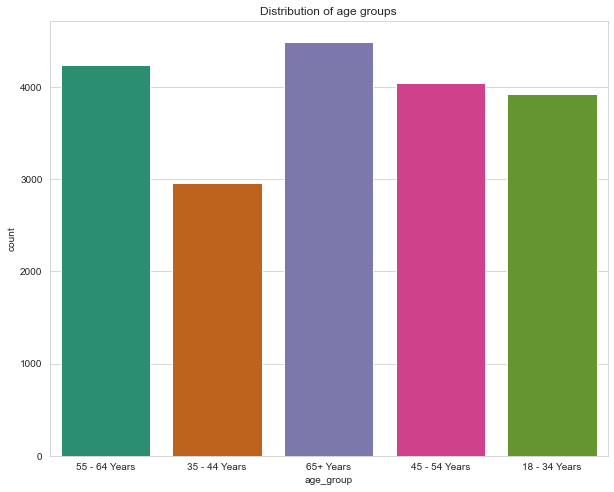

In [15]:
#Distribution of age groups 
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x= "age_group", data = train_data ,palette = 'Dark2')
ax.set_title("Distribution of age groups")
bar.savefig("agegroup.png")

> Most of the respondents were older than 65 years.

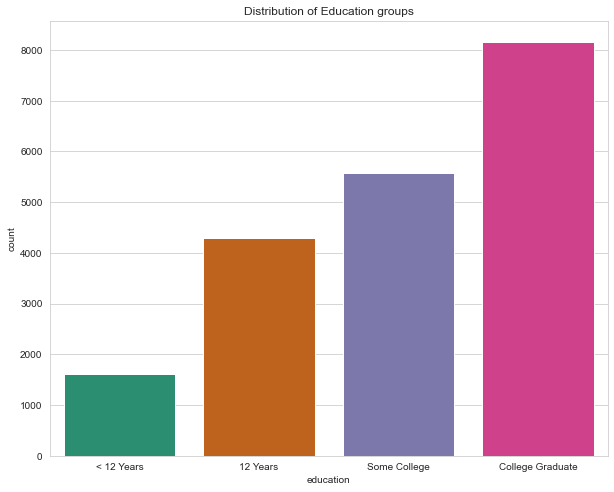

In [16]:
#Distribution of Education groups
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x= "education", data = train_data ,palette = 'Dark2')
ax.set_title("Distribution of Education groups")
bar.savefig("education.png")

> The majority number of respondents were college graduates.

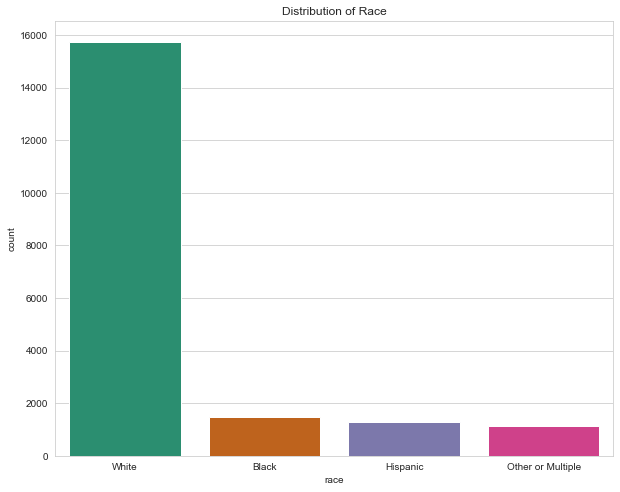

In [17]:
#Distribution of race
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x= "race", data = train_data ,palette = 'Dark2')
ax.set_title("Distribution of Race")
bar.savefig("race.png")

> Most of the respondents were caucasians.

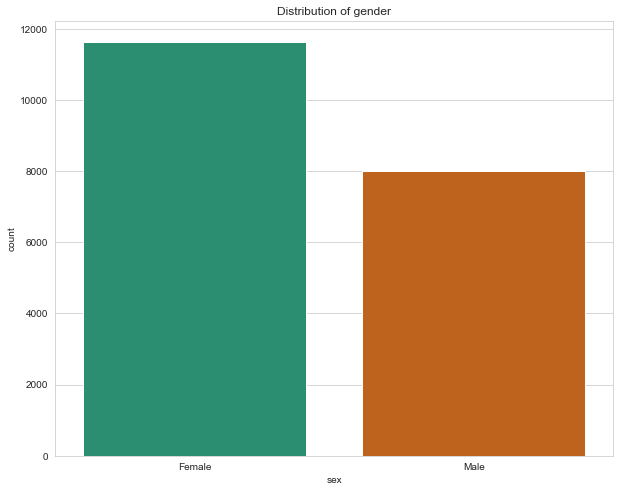

In [18]:
#Distribution of gender 
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x= "sex", data = train_data ,palette = 'Dark2')
ax.set_title("Distribution of gender")
bar.savefig("sex.png")

> Most of the respondents were female.

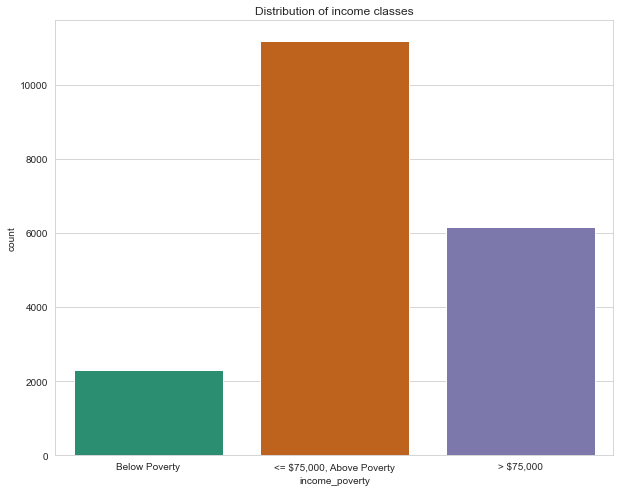

In [19]:
#Distribution of income classes
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x= "income_poverty", data = train_data ,palette = 'Dark2')
ax.set_title("Distribution of income classes")
bar.savefig("income.png")

> Most respondents were above the income poverty line.

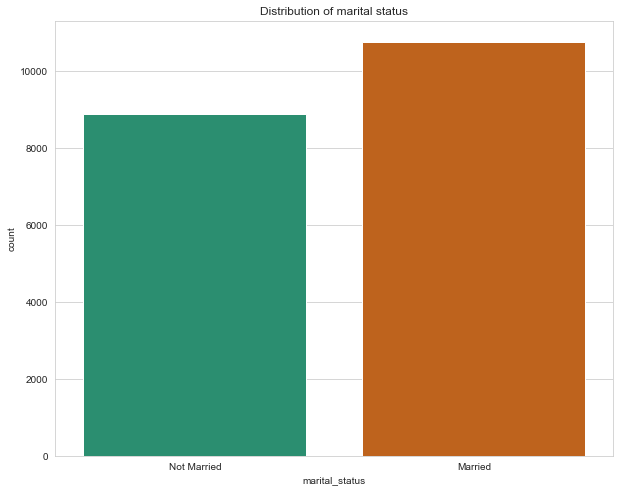

In [20]:
#Distribution of marital status
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x= "marital_status", data = train_data ,palette = 'Dark2')
ax.set_title("Distribution of marital status")
bar.savefig("maritalstatus.png")

> Most of the respondents were married.

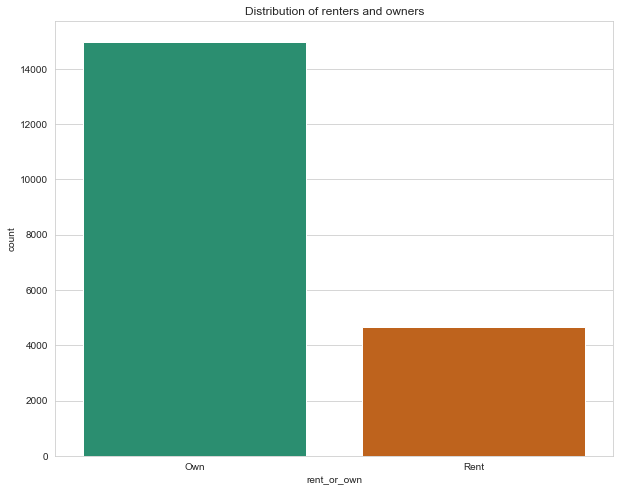

In [21]:
#Distribution of house situation
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x= "rent_or_own", data = train_data ,palette = 'Dark2')
ax.set_title("Distribution of renters and owners")
bar.savefig("rentown.png")

> Most of the respondents were home owners.

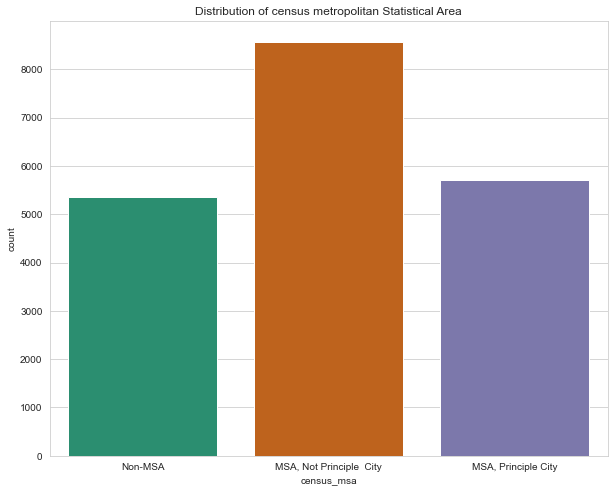

In [22]:
#Distribution of census metropolitan Statistical Area
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x= "census_msa", data = train_data ,palette = 'Dark2')
ax.set_title("Distribution of census metropolitan Statistical Area")
bar.savefig("census_msa.png")

> Most of the respondents were in the MSA,but not the priciple city.

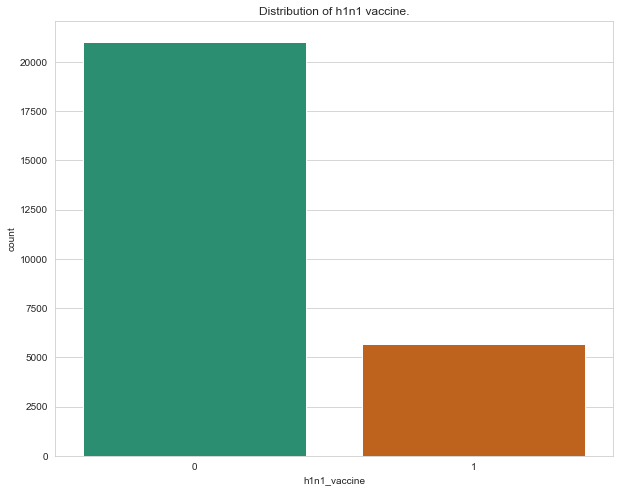

In [23]:
#Distribution of h1n1 vaccine.
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x= "h1n1_vaccine", data = train_data_labels ,palette = 'Dark2')

ax.set_title("Distribution of h1n1 vaccine.")
bar.savefig("h1n1vacc.png")

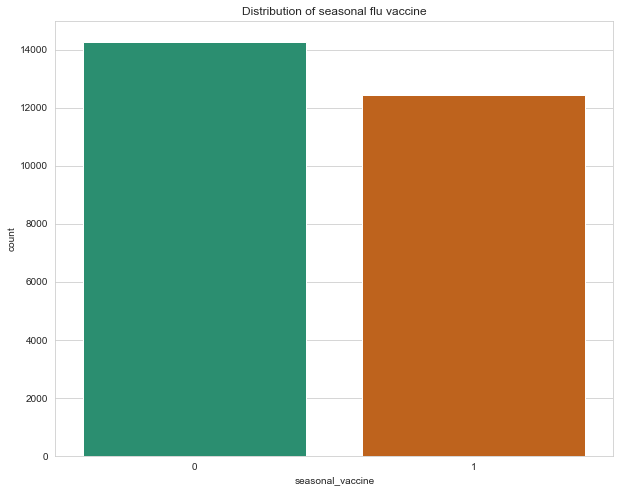

In [24]:
#Distribution of seasonal flu vaccine
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.countplot(x= "seasonal_vaccine", data = train_data_labels ,palette = 'Dark2')

ax.set_title("Distribution of seasonal flu vaccine")
bar.savefig("seasonalvacc.png")


> As seen,seasonal flu vaccine target variable has balanced classes in comparison to h1n1 flu vaccine target variable.

### Multivariate Analysis
> Since in the multivariate analysis,we want to compare our variables to our target variable,we will have to join 
train_data dataframe and train_data_labels data frame.

### Joining the data sets.


In [25]:
combined_train = pd.merge(train_data,train_data_labels,on = "respondent_id")
combined_train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,sex,income_poverty,marital_status,rent_or_own,employment_status,census_msa,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0,1
2,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0,1
3,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0,0
4,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,Male,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",2.0,3.0,0,0


> The chosen target variable is the seasonal flu vaccine.All visualizations made below will be in respect to that.

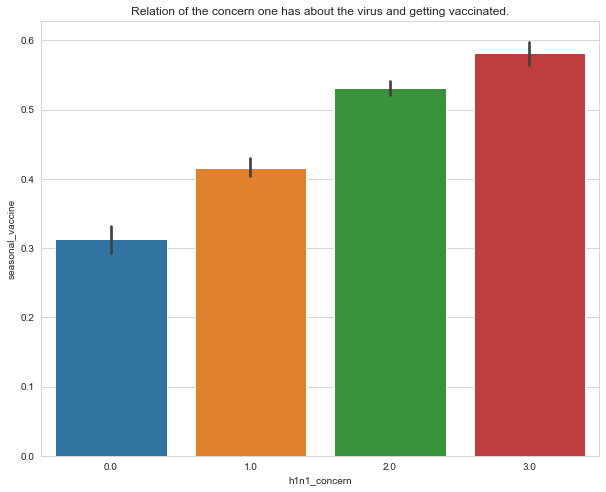

In [26]:
#relation between the concern one has about the virus and getting vaccinated
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=combined_train, x="h1n1_concern",y="seasonal_vaccine")

ax.set_title("Relation of the concern one has about the virus and getting vaccinated.")
bar.savefig("h1n1concern.png")


> As seen the people with the most concern about the virus have a higher chance of getting the seasonal flu vaccine.

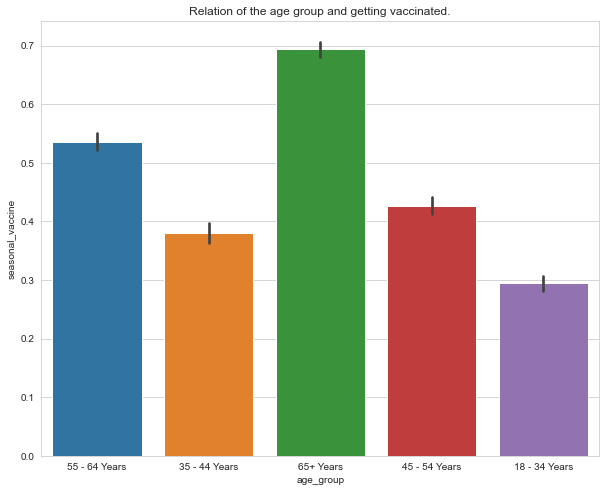

In [27]:
#relation between the age group and getting vaccinated
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=combined_train, x="age_group",y="seasonal_vaccine")

ax.set_title("Relation of the age group and getting vaccinated.")
bar.savefig("agecorr.png")


> People over the age of 65 have received a shot of seasonal flu vaccine.

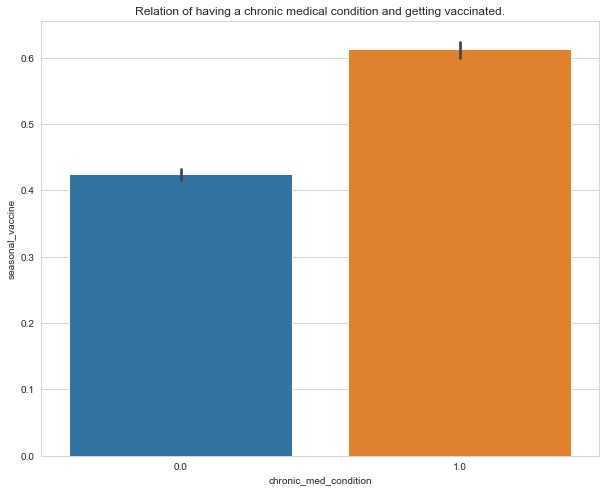

In [28]:
#relation between one having a chronic medical condition and getting vaccinated
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=combined_train, x="chronic_med_condition",y="seasonal_vaccine")

ax.set_title("Relation of having a chronic medical condition and getting vaccinated.")
bar.savefig("chronicmedcorr.png")

> Respondents with a chronic medical condition have a higher chance of getting vaccinated.

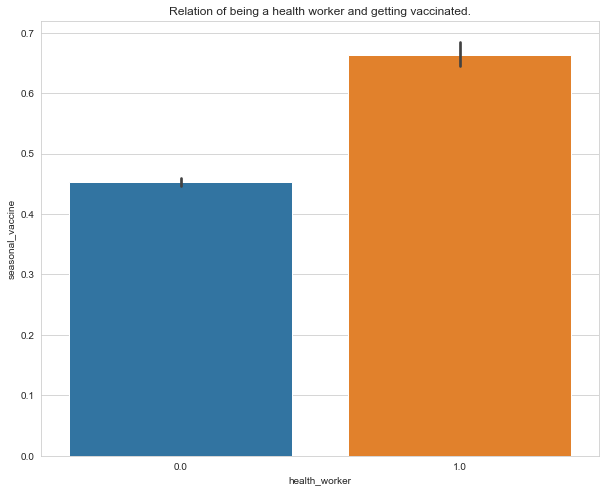

In [29]:
#Relation between being a health worker and getting a seasonal flu vaccine 
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=combined_train, x="health_worker",y="seasonal_vaccine")

ax.set_title("Relation of being a health worker and getting vaccinated.")
bar.savefig("healthworkercorr.png")

> Due to their work environment,people working in the health care capacity are more prone to diseases,therefore they have a higher possibility of getting a seasonal flu vaccine.

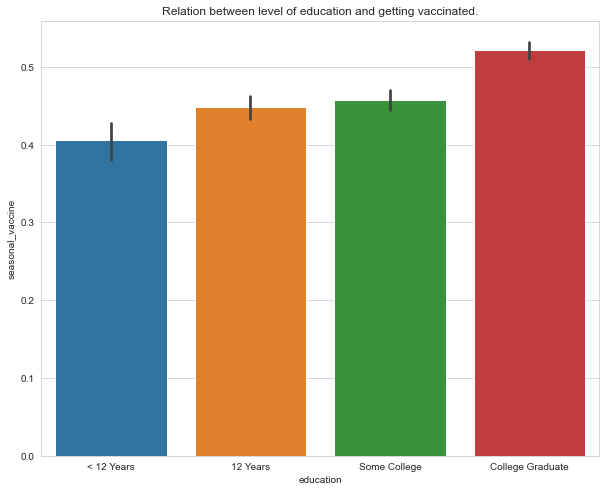

In [30]:
#Relation between level of education and getting a seasonal flu vaccine.
sns.set_style("whitegrid")

bar,ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(data=combined_train, x="education",y="seasonal_vaccine")

ax.set_title("Relation between level of education and getting vaccinated.")
bar.savefig("healthworkercorr.png")

> As seen,people with higher education have a more likelihood of getting the seasonal flu vaccine.

## 7. Implementing the solution

### Correlations

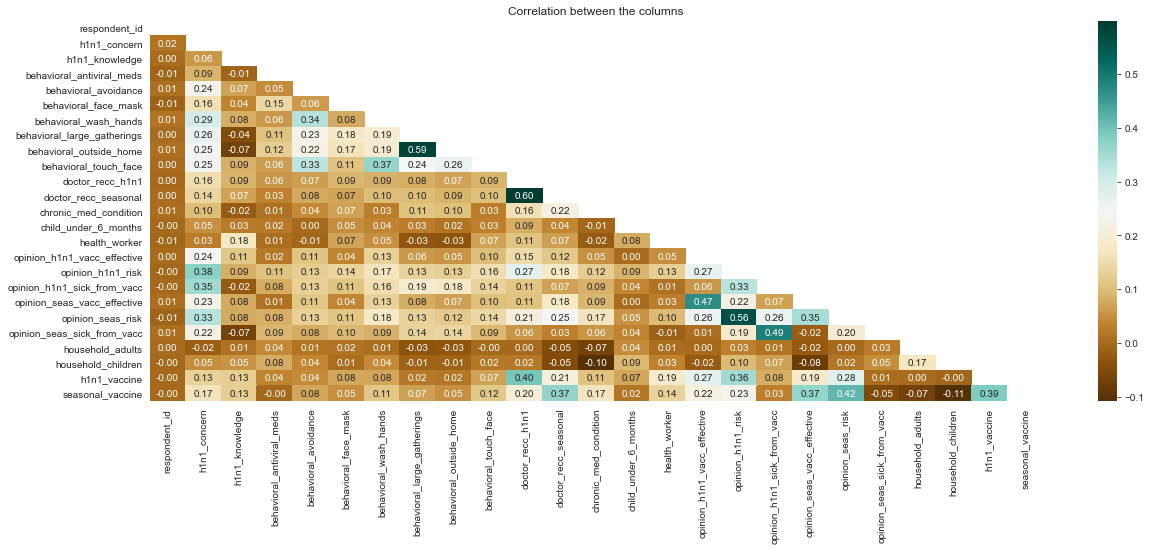

In [31]:
#correlation heatmap
plt.figure(figsize=(20,7))
mask = np.triu(np.ones_like(combined_train.corr(), dtype=bool))
sns.heatmap(combined_train.corr(),annot=True,cmap="BrBG",fmt=".2f", mask=mask);
plt.title('Correlation between the columns')
plt.show()

### Encoding categorical data

In [32]:
#defining the categorical columns
categorical_columns = ['employment_status','age_group','education','race','sex','income_poverty','marital_status','rent_or_own',
                       'census_msa']
#initialize the label encoder
lab = LabelEncoder()

#encode all categorical columns

for column in categorical_columns:
    combined_train[column] = lab.fit_transform(combined_train[column])


### Checking for multicollinearity using VIF

In [33]:
# the independent variables set
X = combined_train.drop(labels=["seasonal_vaccine"],axis=1)
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
pd.DataFrame(vif_data).sort_values(by=['VIF'], ascending=False)

,feature,VIF
15,opinion_h1n1_vacc_effective,21.992887
18,opinion_seas_vacc_effective,21.382281
23,race,9.078943
19,opinion_seas_risk,8.387860
16,opinion_h1n1_risk,7.767831
6,behavioral_wash_hands,7.681316
1,h1n1_concern,6.435400
2,h1n1_knowledge,6.396391
17,opinion_h1n1_sick_from_vacc,6.026470
4,behavioral_avoidance,4.802432


### Creating  baseline models.

> To start off,several models will be run with default setting,and decide which models to further tune.

In [35]:
# check the dummy accuracy of initial raw data
print("Raw Counts")
print(combined_train["seasonal_vaccine"].value_counts())
print()
print("Dummy accuracy")
print(combined_train["seasonal_vaccine"].value_counts(normalize=True))


Raw Counts
0    10254
1     9388
Name: seasonal_vaccine, dtype: int64

Dummy accuracy
0    0.522045
1    0.477955
Name: seasonal_vaccine, dtype: float64


In [36]:
#perform a train test split
X = combined_train.drop(labels=["seasonal_vaccine"],axis=1)
y = combined_train["seasonal_vaccine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
# Instantiate different classification models
randomforest_model = RandomForestClassifier(random_state = 42)
logisticreg_model = LogisticRegression(random_state = 42)
decisiontree_model = DecisionTreeClassifier(random_state = 42)
knn_model = KNeighborsClassifier()
naivebayes_model = GaussianNB()

In [38]:
#fit the models
train_accuracy = []
test_accuracy = []
model_list = [randomforest_model,logisticreg_model, decisiontree_model, knn_model, naivebayes_model]
for i in model_list:
    i = i.fit(X_train, y_train)
    ytrain_pred = i.predict(X_train)
    ytest_pred = i.predict(X_test)
    train_accuracy.append(accuracy_score(ytrain_pred, y_train))
    test_accuracy.append(accuracy_score(ytest_pred, y_test))

In [39]:
#display train set accuracy
train_accuracy

[1.0, 0.7729905174059696, 1.0, 0.7230955259975816, 0.7648443963597021]

In [40]:
#display test set accuracy
test_accuracy

[0.7984219903283278,
 0.7790786459658946,
 0.7042504454059557,
 0.5329600407228302,
 0.7582081954695852]

### Summary of the results

- Random Forest classifier:Train accuracy:1.0,Test accuracy:0.798.
- Logistic Regression model: Train accuracy:0.773,Test accuracy:0.779.
- Decision Tree Classifier: Train accuracy:1.0,Test accuracy:0.704.
- KNN model: Train accuracy:0.723,Test accuracy:0.533.
- Naive Bayes model: Train accuracy:0.765,Test accuracy:0.758.


> The models that will be tuned are the:Random Forest model,Decision Tree classifier and the logistic regression model
.

### a) Random forest classifier

In [41]:
# Defining the range of hyperparameters to search over
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8]
}


In [42]:
# Initializing the Random Forest classifier
rf = RandomForestClassifier()

# Using GridSearchCV to perform a search over the hyperparameters set.
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'n_estimators': [10, 50, 100, 200]})

In [43]:
# The best hyperparameters and score can be obtained using the best_params_ and best_score_ attributes
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Best parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 200}
Best score: 0.8050654025303114


### b)Logistic regression model

In [44]:
# Defining the hyperparameters to search
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'penalty': ['l1', 'l2']}

In [45]:
# Initializing the logistic regression model
logistic_regression = LogisticRegression()

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'C': 0.1, 'penalty': 'l2'}


In [46]:
# Use the best parameters to train the final model
logistic_regression = grid_search.best_estimator_
logistic_regression.fit(X_train, y_train)

# Evaluate the performance on the test set
accuracy = logistic_regression.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

Accuracy on test set:  0.7895138712140494


### c) Decision Tree classifier

In [47]:
# Define the hyperparameters to search
param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [48]:
# Initialize the decision tree classifier
dt = DecisionTreeClassifier()

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 6, 'min_samples_split': 8}


In [49]:
# Use the best parameters to train the final model
dt = grid_search.best_estimator_
dt.fit(X_train, y_train)

# Evaluate the performance on the test set
accuracy = dt.score(X_test, y_test)
print("Accuracy on test set: ", accuracy)

Accuracy on test set:  0.787223212013235


### Evaluation

> The model with the best performance,was the Random forest classifier.A model with the best parameters will be instantiated.

In [54]:
#initialize the classifier
random_f_finalmodel = RandomForestClassifier(max_depth =20, min_samples_leaf= 2, n_estimators= 200)

In [55]:
#fit the model 
random_f_finalmodel.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=200)

In [56]:
preds = random_f_finalmodel.predict(X_test)
probs = random_f_finalmodel.predict_proba(X_test)


print("log loss: ", log_loss(y_test, probs))
print("accuracy: ", accuracy_score(y_test, preds))
#print(classification_report(y_test, preds, digits=3))

log loss:  0.4401209768823195
accuracy:  0.8093662509544414


> The accuracy of the final model is at 80.9% .

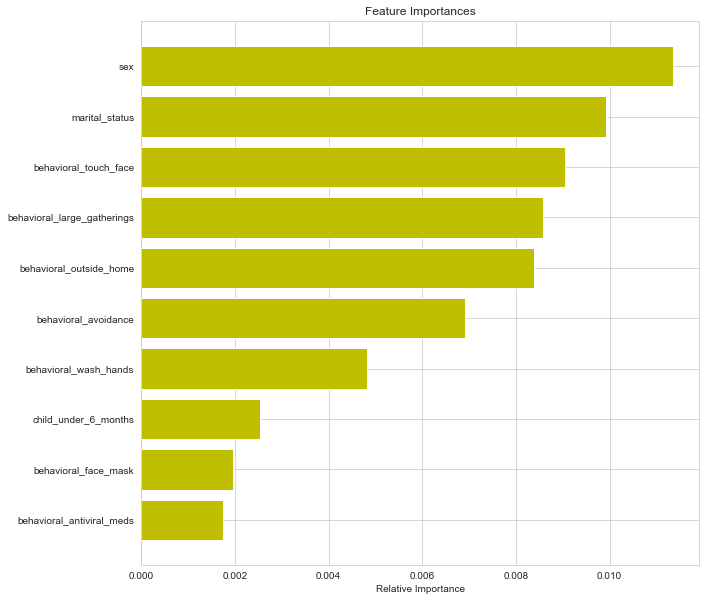

In [64]:
#visualizing best features 
features = X_train.columns
importances = random_f_finalmodel.feature_importances_
indices = np.argsort(importances)[:10]

# number of features to be displayed.
num_features = 10 

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Observations

- From the feature importance,sex,marital status,whether one touches their face,whether one goes to large gatherings seem to stand out.


#### Interpretation
> The dummy model accuracy is 52.2%.

> The final model accuracy is 80.9%.

- This shows there was significant improvement from the dummy model.

# 8. Conclusions.

- The best working model was the random forest classifier with an accuracy of 80.7%.
- The accuracy of the model aims in learning the demographics of people to work on to get vaccinated.
- People with higher education have a more likelihood of getting the vaccine.
- People in the health care industry have a higher chance of getting the vaccine.
- Most people who have a more likelihood to get the vaccine are over 65 years.


# 9. Recommendations

- The foundation should create more awareness by using multiple chanels such as social media,websites,in order to reach people below 65 years as well.
- The foundation should partner with community organizations to provide education about vaccination.
- They should perform further investigation on what parameters that need to be added to improve model accuracy.